# Aprendizaje No-Supervisado

Recordemos que el proposito del aprendizaje automatico superviado es predecir la realidad. El aprendizaje no supervisado tiene como proposito clasificar la realidad y generar predicciones sobre esta clasificacion. El aprendizaje no supervisado clasifica por similaridad.

La principal ventaja del aprendizaje no supervisado es que no se necesitan series de datos etiquetadas para proceder a la clasificacion.

La gran mayoria de modelos de aprendizaje no supervisado utilizan tecnicas de agrupacion por similaridad (distancia) entre parametros.

Vamos a necesitar los siguientes modulos:

In [1]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()
%matplotlib inline

**Generamos** un grupo de puntos utilizando la funcion make_blobs:

In [2]:
puntos, idx_grupos = make_blobs(n_samples=300,
                                centers=4,
                                cluster_std=0.8,
                                random_state=0)

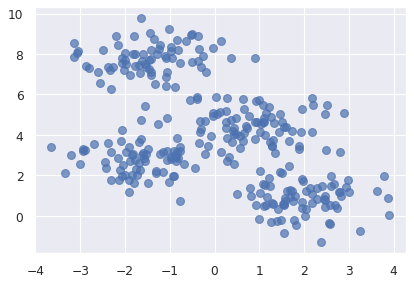

In [3]:
x = puntos[:, 0]
y = puntos[:, 1]

plt.figure(figsize=(6, 4), dpi=80)
plt.scatter(x, y, s=50, alpha=0.7);

Podemos ajustar estos puntos a un numero determinado de grupos:

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


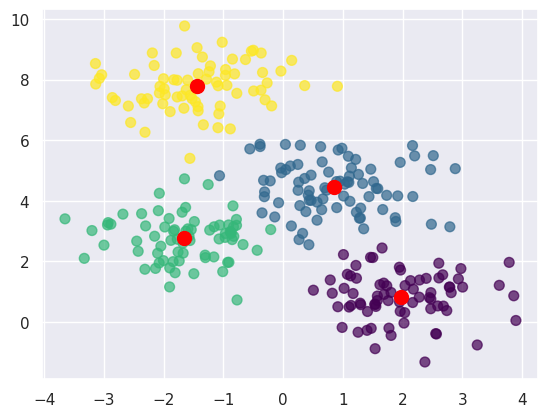

In [4]:
# https://scikit-learn.org/stable/modules/clustering.html#k-means
k_medias = KMeans(n_clusters=4, random_state=0)
k_medias.fit(puntos)
idx_prediccion = k_medias.predict(puntos)

plt.scatter(x, y, c=idx_prediccion, s=50, alpha=0.7, cmap='viridis')

centroides = k_medias.cluster_centers_
plt.scatter(centroides[:, 0], centroides[:, 1], c='red', s=100);

Este es el procedimiento del algoritmo:

![picture](https://drive.google.com/uc?export=view&id=1-05xoK1X6jPUlA-lRg-E2mSP7STLM-Me)

¿Puedes probar a agrupar estos puntos en otro numero de grupos: 2, 3, 5 y 15 grupos?¿Que efecto tiene en la posicion de los centroides?¿Cual es el numero correcto de grupos?

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


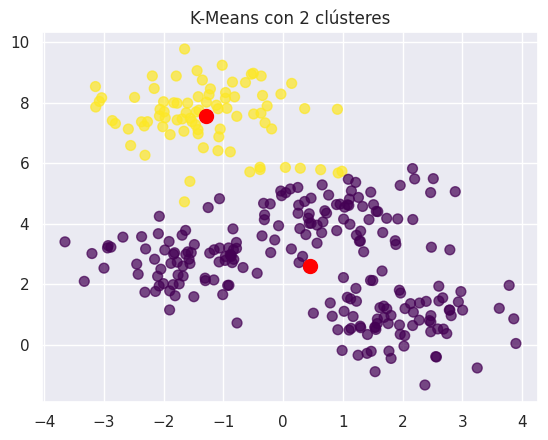

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


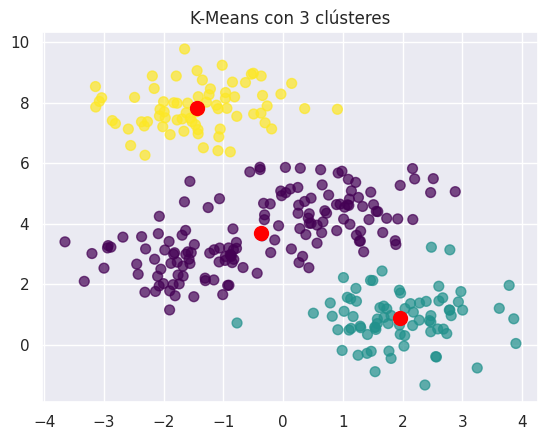

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


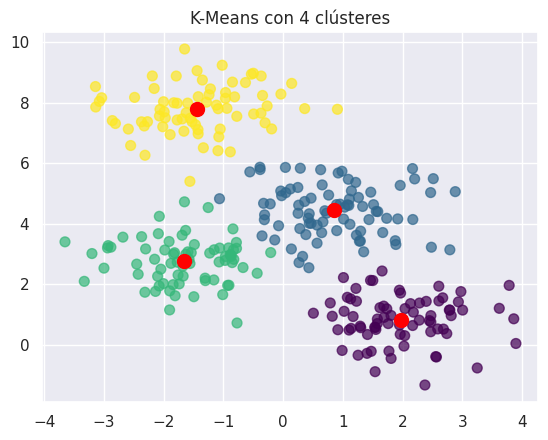

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


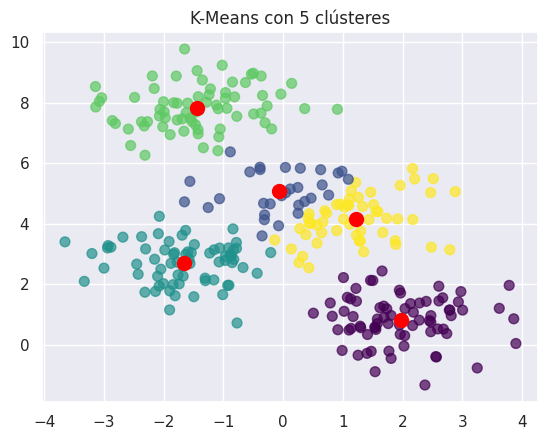

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


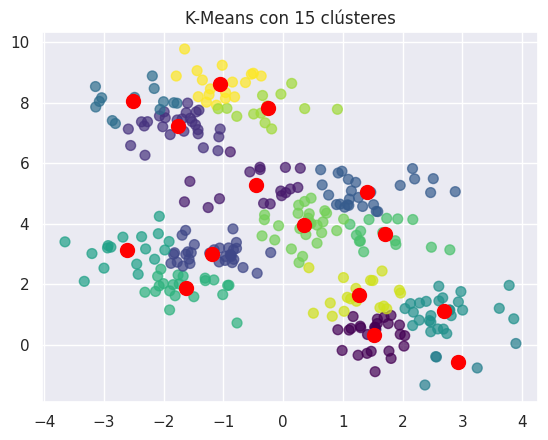

In [34]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

# Generar puntos aleatorios
puntos, _ = make_blobs(n_samples=300, centers=4, cluster_std=0.8, random_state=0)

# Función para ajustar y graficar K-Means con diferentes números de clústeres
def ajustar_kmeans(n_clusters):
    k_medias = KMeans(n_clusters=n_clusters, random_state=0)
    k_medias.fit(puntos)
    idx_prediccion = k_medias.predict(puntos)
    centroides = k_medias.cluster_centers_

    # Graficar
    plt.scatter(puntos[:, 0], puntos[:, 1], c=idx_prediccion, s=50, alpha=0.7, cmap='viridis')
    plt.scatter(centroides[:, 0], centroides[:, 1], c='red', s=100)
    plt.title(f"K-Means con {n_clusters} clústeres")
    plt.show()

# Números de clústeres
numeros_clusters = [2, 3, 4, 5, 15]

# Ajustar y graficar para cada número de clústeres
for n in numeros_clusters:
    ajustar_kmeans(n)

**¿Qué efecto tiene en la posicion de los centroides?**

Cuando cambiamos el números de grupos, los centroides se vuelven a posicionar para que se minimice la distancia dentro de cada grupo. Cuando hay menos grupos, los centroides se ubican en posiciones más céntricas respecto a los datos globales. Cuando aumentamos el número de grupos, estos centroides se van distribuyendo intentando capturar la estructura local de los datos, lo que hace que se ubiquen en subconjuntos mucho más pequeños.

**¿Cuál es el número correcto de grupos?**

Para saber el número correcto de grupos se suele utilizar el método del codo. Para esto, realizamos una gráfica con la suma de las distancias al cuadrado de los puntos a sus respectivos centroides para los diferentes números de grupos y buscaremos un punto donde, al descender en esta suma de distancias, se vuelve más equilibrado.

También esto depende del contexto y del propósito del análisis, por lo que debemos considerar tanto los criterios estadísticos como los conocimientos del dominio.

Siguiendo el código y aplicando el método del codo, podemos ver que el grupo correcto de grupos sería 4.

***En el código previo he añadido un clúster de 4 grupos para una mayor visualización y que podamos observar como se reparten correctamente los datos.***

Podemos utilizar un metodo menos visual para decidir el numero de grupos que nos ofrece la clasificacion mas efectiva:

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

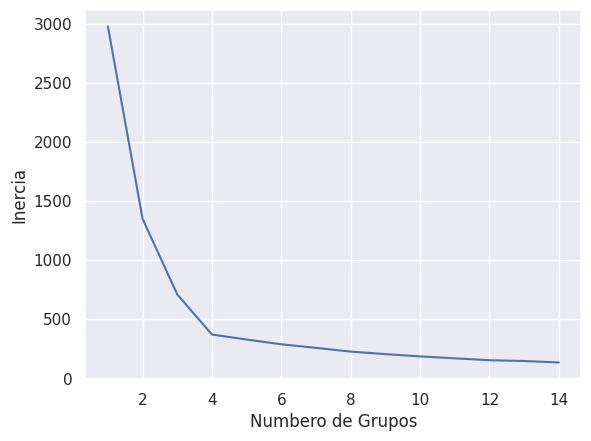

In [6]:
inercias = []

for i in range(1, 15):
  k_medias = KMeans(n_clusters=i, random_state=0)
  k_medias.fit(puntos)
  inercias.append(k_medias.inertia_)

plt.plot(range(1, 15), inercias)
plt.xlabel('Numbero de Grupos')
plt.ylabel('Inercia');

Ya que el metodo visual no es muy mecanico, podemos encontrar la posicion del mejor valor en el codo mediante la doble derivacion:

In [7]:
pct_difs = np.diff(inercias)/np.array(inercias[1:])
pct_difs

array([-1.20820979, -0.90310861, -0.91804932, -0.12904541, -0.14077872,
       -0.11760151, -0.14126267, -0.10352559, -0.10580101, -0.09651899,
       -0.10575639, -0.0457493 , -0.09128665])

In [8]:
pct_dif_dif = np.diff(pct_difs)
pct_dif_dif

array([ 0.30510118, -0.01494072,  0.78900391, -0.01173331,  0.02317721,
       -0.02366116,  0.03773707, -0.00227542,  0.00928202, -0.0092374 ,
        0.0600071 , -0.04553735])

In [9]:
mejor_codo = np.argmax(pct_dif_dif)+2
mejor_codo

4

# Segmentacion de clientes

Datos adaptados de:
https://github.com/jeffprosise/Machine-Learning/blob/master/Data/customers.csv

Este tipo de tecnicas se pueden utilizar para segmentar, por ejemplo, los clientes de una empresa para poder ofrecerles el mejor servicio personalizado posible:

In [11]:
import pandas as pd

archivo_clientes = '/content/clientes.txt'
clientes = pd.read_csv(archivo_clientes, index_col='ID:Cliente')
clientes.head()

,Genero,Edad,Salario,Clasificacion_gasto
ID:Cliente,,,,
1,Hombre,19,15,39
2,Hombre,21,15,81
3,Mujer,20,16,6
4,Mujer,23,16,77
5,Mujer,31,17,40


**Salario** y Clasificacion de Gasto nos pueden indicar que clientes podrian estar interesados en aumentar su nivel de compras:

In [12]:
puntos = clientes[ ['Salario','Clasificacion_gasto'] ].values
print(puntos)

[[ 15  39]
 [ 15  81]
 [ 16   6]
 [ 16  77]
 [ 17  40]
 [ 17  76]
 [ 18   6]
 [ 18  94]
 [ 19   3]
 [ 19  72]
 [ 19  14]
 [ 19  99]
 [ 20  15]
 [ 20  77]
 [ 20  13]
 [ 20  79]
 [ 21  35]
 [ 21  66]
 [ 23  29]
 [ 23  98]
 [ 24  35]
 [ 24  73]
 [ 25   5]
 [ 25  73]
 [ 28  14]
 [ 28  82]
 [ 28  32]
 [ 28  61]
 [ 29  31]
 [ 29  87]
 [ 30   4]
 [ 30  73]
 [ 33   4]
 [ 33  92]
 [ 33  14]
 [ 33  81]
 [ 34  17]
 [ 34  73]
 [ 37  26]
 [ 37  75]
 [ 38  35]
 [ 38  92]
 [ 39  36]
 [ 39  61]
 [ 39  28]
 [ 39  65]
 [ 40  55]
 [ 40  47]
 [ 40  42]
 [ 40  42]
 [ 42  52]
 [ 42  60]
 [ 43  54]
 [ 43  60]
 [ 43  45]
 [ 43  41]
 [ 44  50]
 [ 44  46]
 [ 46  51]
 [ 46  46]
 [ 46  56]
 [ 46  55]
 [ 47  52]
 [ 47  59]
 [ 48  51]
 [ 48  59]
 [ 48  50]
 [ 48  48]
 [ 48  59]
 [ 48  47]
 [ 49  55]
 [ 49  42]
 [ 50  49]
 [ 50  56]
 [ 54  47]
 [ 54  54]
 [ 54  53]
 [ 54  48]
 [ 54  52]
 [ 54  42]
 [ 54  51]
 [ 54  55]
 [ 54  41]
 [ 54  44]
 [ 54  57]
 [ 54  46]
 [ 57  58]
 [ 57  55]
 [ 58  60]
 [ 58  46]
 [ 59  55]

Otra manera de hacer el vector.

In [13]:
x = clientes[['Salario']].values.squeeze()
y = clientes[['Clasificacion_gasto']].values.squeeze()
print(x)
print(y)

[ 15  15  16  16  17  17  18  18  19  19  19  19  20  20  20  20  21  21
  23  23  24  24  25  25  28  28  28  28  29  29  30  30  33  33  33  33
  34  34  37  37  38  38  39  39  39  39  40  40  40  40  42  42  43  43
  43  43  44  44  46  46  46  46  47  47  48  48  48  48  48  48  49  49
  50  50  54  54  54  54  54  54  54  54  54  54  54  54  57  57  58  58
  59  59  60  60  60  60  60  60  61  61  62  62  62  62  62  62  63  63
  63  63  63  63  64  64  65  65  65  65  67  67  67  67  69  69  70  70
  71  71  71  71  71  71  72  72  73  73  73  73  74  74  75  75  76  76
  77  77  77  77  78  78  78  78  78  78  78  78  78  78  78  78  79  79
  81  81  85  85  86  86  87  87  87  87  87  87  88  88  88  88  93  93
  97  97  98  98  99  99 101 101 103 103 103 103 113 113 120 120 126 126
 137 137]
[39 81  6 77 40 76  6 94  3 72 14 99 15 77 13 79 35 66 29 98 35 73  5 73
 14 82 32 61 31 87  4 73  4 92 14 81 17 73 26 75 35 92 36 61 28 65 55 47
 42 42 52 60 54 60 45 41 50 46 51 46 56 5

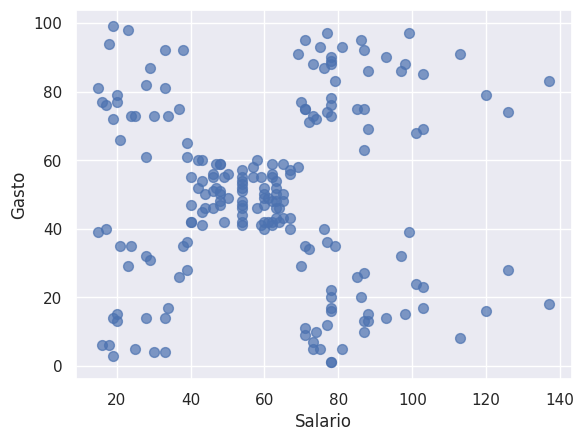

In [14]:
x = puntos[:, 0]
y = puntos[:, 1]

plt.scatter(x, y, s=50, alpha=0.7)
plt.xlabel('Salario')
plt.ylabel('Gasto');

¿En cuantos grupos podemos agruparlos? Visualmente parece que 5 grupos nos dan el menor numero de grupos que maximiza las diferencias entre los clientes de cada grupo.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


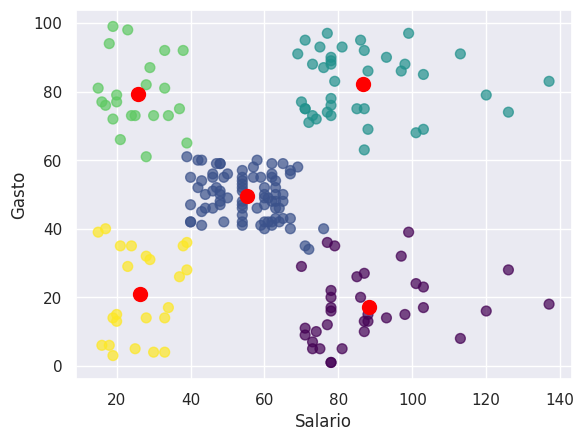

In [15]:
k_medias = KMeans(n_clusters=5, random_state=0)
k_medias.fit(puntos)
idx_prediccion = k_medias.predict(puntos)

plt.scatter(x, y, c=idx_prediccion, s=50, alpha=0.7, cmap='viridis')
plt.xlabel('Salario')
plt.ylabel('Gasto')

centroides = k_medias.cluster_centers_
plt.scatter(centroides[:, 0], centroides[:, 1], c='red', s=100);

Hemos elegido 5 grupos por inspeccion visual del grafico. ¿Podrias demostrar que esta eleccion es correcta?

Para validar esta elección vamos a utilizar el método del codo, donde calcularemos la suma de las distancias cuadradas (WCSS) de los puntos con sus respectivos centroides del clúster para diferentes cantidades de clústeres. Buscaremos un punto donde la tasa de disminución de esta suma cambia de forma notable, lo que nos indicará un equilibrio entre el número de clústeres y la compactación de los mismos.

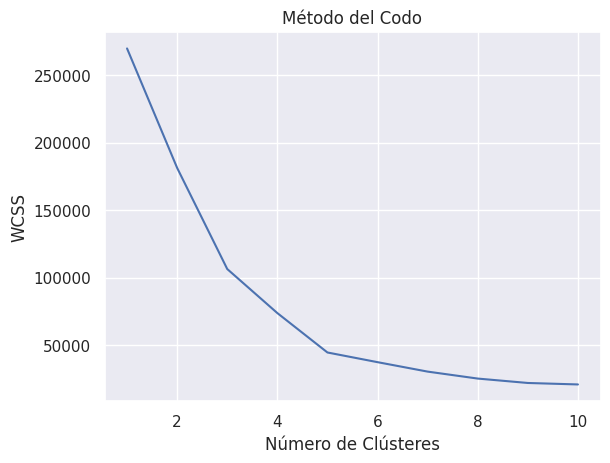

In [16]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Cálculo de WCSS para diferentes números de clústeres
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(puntos)
    wcss.append(kmeans.inertia_)

# Gráfica del método del codo
plt.plot(range(1, 11), wcss)
plt.title('Método del Codo')
plt.xlabel('Número de Clústeres')
plt.ylabel('WCSS') # Suma de distancias cuadradas dentro del clúster
plt.show()

Además de la visualización de la gráfica para ver como repartir correctamente los datos en diferentes grupos, y donde ya podemos observar como en 5 grupos ya hay un punto de inflexión donde se empieza a equilibrar el número de clústeres y la compactación de los mismos, hemos utilizado al doble derivación para comprobar que la mejor elección es repartir los datos en 5 grupos.

In [36]:
pct_difs = np.diff(wcss)/np.array(wcss[1:])
pct_dif_dif = np.diff(pct_difs)
mejor_codo = np.argmax(pct_dif_dif)+2
mejor_codo

5

¿Cuales son los clientes con mayor salario y menor gasto? Podemos predecir en que grupo apareceria un cliente que tenga un salario de 120 y un gasto de 20:

In [17]:
objetivo = k_medias.predict(np.array([[20, 20]]))[0]
objetivo

4

Los clientes de este grupo de interes se pueden extraer de la serie de datos completa:

In [18]:
# Grupo de poco gastadores con altos ingresos:
clientes['Grupo'] = k_medias.predict(clientes[['Salario','Clasificacion_gasto']].values)
# Filtrado solo para estos clientes:
clientes[ clientes['Grupo'] == objetivo]

,Genero,Edad,Salario,Clasificacion_gasto,Grupo
ID:Cliente,,,,,
1,Hombre,19,15,39,4
3,Mujer,20,16,6,4
5,Mujer,31,17,40,4
7,Mujer,35,18,6,4
9,Hombre,64,19,3,4
11,Hombre,67,19,14,4
13,Mujer,58,20,15,4
15,Hombre,37,20,13,4
17,Mujer,35,21,35,4


In [19]:
clientes.tail()

,Genero,Edad,Salario,Clasificacion_gasto,Grupo
ID:Cliente,,,,,
196,Mujer,35,120,79,2
197,Mujer,45,126,28,0
198,Hombre,32,126,74,2
199,Hombre,32,137,18,0
200,Hombre,30,137,83,2


Orientando nuestros esfuerzos de marketing y ventas hacia estos clientes quizas maximicemos nuestra eficacia. Otro modelo podria entonces clasificar los clientes por susceptibilidad a nuestras ofertas.

# Clasificacion Multivariable

La clasificacion no esta limitada a dos variables (bivariable), sino que puede ser multivariable. Para ello, debemos primero modificar el formato de nuestros datos para hacer todas las variables comprensibles por la maquina:

In [20]:
from sklearn.preprocessing import LabelEncoder

df = clientes.copy()
codificador = LabelEncoder()
df['Genero'] = codificador.fit_transform(df['Genero'])
df.head()

,Genero,Edad,Salario,Clasificacion_gasto,Grupo
ID:Cliente,,,,,
1,0,19,15,39,4
2,0,21,15,81,3
3,1,20,16,6,4
4,1,23,16,77,3
5,1,31,17,40,4


Generando codificadores de etiquetas:

In [21]:
codificador_frutas = LabelEncoder()
frutas = ['Piña', 'Platano', 'Manzana', 'Pera']

In [22]:
codificador_frutas.fit(frutas);

In [23]:
codificador_frutas.transform(['Pera'])

array([1])

In [24]:
codificador_frutas.inverse_transform([3])

array(['Platano'], dtype='<U7')

Usaremos 3 variables inicialmente, es el limite de variables que podemos representar facilmente en el espacio tridimensional:

In [25]:
puntos = df[['Edad', 'Salario', 'Clasificacion_gasto']].values

In [26]:
k_medias = KMeans(n_clusters=5, random_state=0)
k_medias.fit(puntos)
df['Grupo'] = k_medias.predict(puntos)
df.Grupo

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


ID:Cliente
1      0
2      4
3      0
4      4
5      0
      ..
196    1
197    3
198    1
199    3
200    1
Name: Grupo, Length: 200, dtype: int32

Generamos una visualizacion tridimensional:

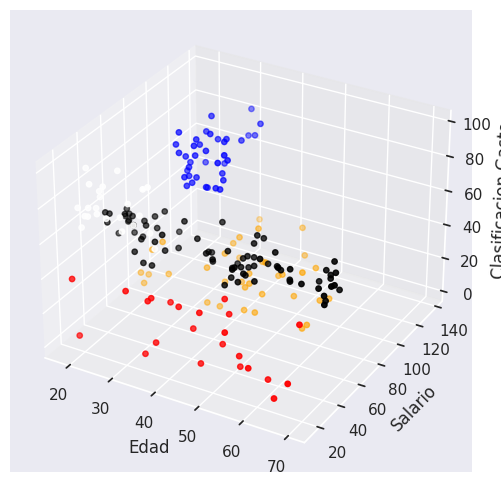

In [27]:
from mpl_toolkits.mplot3d import Axes3D

colors = ['red', 'blue', 'black', 'orange', 'white']

df['color'] = df.Grupo.map({0:colors[0], 1:colors[1], 2:colors[2],
                        3:colors[3], 4:colors[4]})

fig = plt.figure(figsize=(26,6))

ax = fig.add_subplot(132, projection='3d')
ax.scatter(df.Edad, df.Salario, df.Clasificacion_gasto, c=df.color, s=15)
ax.set_xlabel('Edad')
ax.set_ylabel('Salario')
ax.set_zlabel('Clasificacion Gasto')
plt.show()

¿Como son estos grupos? Inspeccionando sus valores medios ganamos algo mas de informacion:

In [28]:
resultados = pd.DataFrame(columns = ['Grupo',
                                     'Edad',
                                     'Ingresos Medios',
                                     'Gasto Medio'])

for i in range(len(k_medias.cluster_centers_)):
    edad = df[df['Grupo'] == i]['Edad'].mean()
    ingresos = df[df['Grupo'] == i]['Salario'].mean()
    gasto = df[df['Grupo'] == i]['Clasificacion_gasto'].mean()

    gdf = df[df['Grupo'] == i]

    resultados.loc[i] = ([i, edad, ingresos, gasto])

resultados.head()

,Grupo,Edad,Ingresos Medios,Gasto Medio
0,0.0,45.217391,26.304348,20.913043
1,1.0,32.692308,86.538462,82.128205
2,2.0,43.088608,55.291139,49.569620
3,3.0,40.666667,87.750000,17.583333
4,4.0,25.521739,26.304348,78.565217


In [29]:
k_medias.predict(np.array([[26, 26, 80]]))[0]

4

# Actividad:

Utilizando el archivo de datos sobre propiedas en EEUU, ¿Que tipo de grupos puedes generar mediante aprendizaje no supervisado?¿Que aplicaciones o utilidades podriamos extraer de estos datos?

Los datos son los siguientes:

'Avg. Area Income': Ingresos medios de los residentes en la localizacion.
'Avg. Area House Age': Antiguedad media de las casas en la ciudad.
'Avg. Area Number of Rooms': Media de habitaciones por casa en la zona.
'Avg. Area Number of Bedrooms': Media de dormitorios por casa en la zona.
'Area Population': Poblacion de la zona en la que se localiza la casa.
'Price': Precio de la casa.
'Address': Direccion postal de la casa.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


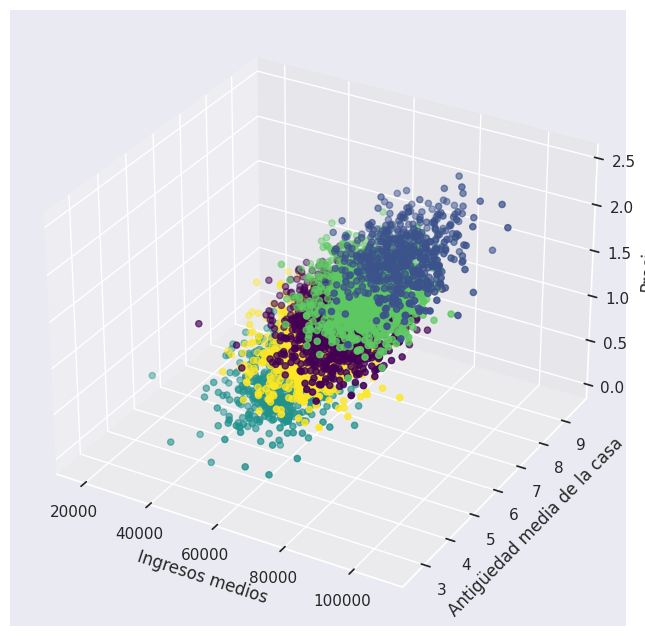

In [30]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Cargar datos
df = pd.read_csv('/content/USA_Housing.csv')

# Seleccionar características para el análisis
caracteristicas = ['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms', 'Avg. Area Number of Bedrooms', 'Area Population', 'Price']
datos = df[caracteristicas].values

# Aplicar K-Means
k_medias = KMeans(n_clusters=5, random_state=0)
k_medias.fit(datos)
df['Grupo'] = k_medias.predict(datos)

# Visualización tridimensional de algunos de los atributos
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['Avg. Area Income'], df['Avg. Area House Age'], df['Price'], c=df['Grupo'], cmap='viridis', s=20)
ax.set_xlabel('Ingresos medios')
ax.set_ylabel('Antigüedad media de la casa')
ax.set_zlabel('Precio')
plt.show()

# Aplicaciones y Utilidades de los Grupos Generados:

**Identificación de Patrones:** Podemos utilizar los grupos que podemos visualizar en la gráfica para visualizar patrones en los tipos de casas que son más comunes en ciertas áreas, como casas con muchas habitaciones pero precios bajos, o casas más antiguas en áreas con altos ingresos.

**Estrategias de Marketing y Ventas:** Los agentes inmobiliarios podrían utilizar la segmentación que estamos creando para redirigir esfuerzos de marketing de forma más efectiva, ya que podrían enfocarse en las características que más atraen a ciertos grupos de compradores.

**Inversión Inmobiliaria:** ya que con esta segmentación los inversores pueden identificar oportunidades de inversión en aquellas áreas más interesantes o en aquellos tipos de propiedades que sean más rentables en los grupos identificados.

In [32]:
import pandas as pd
from sklearn.cluster import KMeans

# Cargar datos
df = pd.read_csv('/content/USA_Housing.csv')

# Seleccionar características para el análisis
caracteristicas = ['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms', 'Avg. Area Number of Bedrooms', 'Area Population', 'Price']
datos = df[caracteristicas].values

# Aplicar K-Means
k_medias = KMeans(n_clusters=5, random_state=0)
k_medias.fit(datos)
df['Grupo'] = k_medias.predict(datos)

# Creación del DataFrame de resultados
resultados = pd.DataFrame(columns=['Grupo', 'Ingresos Medios', 'Antigüedad Casa Media', 'Habitaciones Media',
                                   'Dormitorios Media', 'Población Media', 'Precio Medio'])

for i in range(len(k_medias.cluster_centers_)):
    ingresos_medios = df[df['Grupo'] == i]['Avg. Area Income'].mean()
    antiguedad_casa_media = df[df['Grupo'] == i]['Avg. Area House Age'].mean()
    habitaciones_media = df[df['Grupo'] == i]['Avg. Area Number of Rooms'].mean()
    dormitorios_media = df[df['Grupo'] == i]['Avg. Area Number of Bedrooms'].mean()
    poblacion_media = df[df['Grupo'] == i]['Area Population'].mean()
    precio_medio = df[df['Grupo'] == i]['Price'].mean()

    resultados.loc[i] = ([i, ingresos_medios, antiguedad_casa_media, habitaciones_media,
                          dormitorios_media, poblacion_media, precio_medio])

print(resultados.head())

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


   Grupo  Ingresos Medios  Antigüedad Casa Media  Habitaciones Media  \
0    0.0     68544.120097               5.988999            6.975018   
1    1.0     80290.074315               6.741413            7.535665   
2    2.0     57018.747726               5.204674            6.421217   
3    3.0     73571.193818               6.309458            7.247880   
4    4.0     63627.274406               5.638148            6.752817   

   Dormitorios Media  Población Media  Precio Medio  
0           3.986192     35920.030938  1.227554e+06  
1           4.276463     43507.120072  1.838106e+06  
2           3.614092     29626.201037  6.376731e+05  
3           4.160345     39219.119352  1.495912e+06  
4           3.829417     33042.459480  9.703723e+05  


Además de visualizarlos de forma gráfica, los datos nos pueden aportar más información para poder comprender los grupos que se han creado y como podemos utilizarlos. Al segmentar las propiedades en EE.UU en cinco grupos distintos nos puede revelar algunas tendencias interesantes y diferencias significativas entre los grupos.

# Grupo 0:
Ingresos Medios: $68,544

Antigüedad de la Casa: Aproximadamente 6 años

Número de Habitaciones: Aproximadamente 7

Número de Dormitorios: Casi 4

Población del Área: Aproximadamente 35,920

Precio Medio de la Casa: $1,227,554

**Análisis:**

Por lo que podemos visualizar, las casas son de tamaño medio en áreas con ingresos moderados. Posiblemente sean áreas suburbanas o ciudades pequeñas que tienen buen acceso a servicios.

**Posibles Compradores:**

Familias de clase media que estén buscando un equilibrio entre el coste y la comodidad.

# Grupo 1:
Ingresos Medios: $80,290

Antigüedad de la Casa: Aproximadamente 6.7 años

Número de Habitaciones: Aproximadamente 7.5

Número de Dormitorios: Más de 4

Población del Área: Aproximadamente 43,507

Precio Medio de la Casa: $1,838,106

**Análisis:**

Podríamos decir que son casas grandes, cuyos precios son elevados y por tanto es un área de alto ingreso. Podemos interpretar que son áreas urbanas de alto estatus.

**Posibles Compradores:**

Compradores de alto poder adquisitivo.

# Grupo 2:
Ingresos Medios: $57,018

Antigüedad de la Casa: Aproximadamente 5.2 años

Número de Habitaciones: Aproximadamente 6.4

Número de Dormitorios: Casi 3.6

Población del Área: Aproximadamente 29,626

Precio Medio de la Casa: $637,673

**Análisis:**

Es el segmento más asequible, con casas más pequeñas y precios bajos. Podriamos decir que sn áreas suburbanas o rurales con menor densidad de población.

**Posibles Compradores:**

Aquellas personas que compran su primera vivienda o con presupuestos más ajustados.

# Grupo 3:
Ingresos Medios: $73,571

Antigüedad de la Casa: Aproximadamente 6.3 años

Número de Habitaciones: Aproximadamente 7.2

Número de Dormitorios: Más de 4

Población del Área: Aproximadamente 39,219

Precio Medio de la Casa: $1,495,912

**Análisis:**

Segmento de Gama Alta, con casas grandes y precios relativamente altos. Parecen ser áreas bien desarrolladas, posiblemente cerca de centros urbanos.

**Posibles Compradores:**

Familias de clase alta o aquellos compradores que buscan viviendas de lujo.

# Grupo 4:
Ingresos Medios: $63,627

Antigüedad de la Casa: Aproximadamente 5.6 años

Número de Habitaciones: Aproximadamente 6.7

Número de Dormitorios: Casi 3.8

Población del Área: Aproximadamente 33,042

Precio Medio de la Casa: $970,372

**Análisis:**

Un segmento de rango medio-alto, con ingresos y cuyos precios de las viviendas son asequibles. Seguramente estén ubicadas en ciudades medianas o suburbios.

**Posibles Compradores:**

Familias de clase media-alta, que posiblemente estén buscando una mejor vivienda que la habitual.